<a href="https://colab.research.google.com/github/hahoyeah/PPOA_-Competition/blob/main/PPoA_pro_markdown1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install pandasql

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
from glob import glob
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM   # LSTM 층 
from sklearn.model_selection import train_test_split
import random
import os
import seaborn as sns


# 경고 끄기
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(19970119)
random.seed(19970119)
np.random.seed(19970119)

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import folium

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive
!ls -al

/content/drive/MyDrive
total 325091
drwx------ 2 root root      4096 Jul 25 05:36  버스
drwx------ 2 root root      4096 Jul  4 05:29  영화
drwx------ 2 root root      4096 Jul 21 17:28  쇼핑
drwx------ 2 root root      4096 Aug  1 05:07  와인
drwx------ 2 root root      4096 Nov  8 07:32  현대
drwx------ 2 root root      4096 Jul 13 05:22  따릉이
drwx------ 2 root root      4096 Jul  3 02:10  타이타닉
drwx------ 2 root root      4096 Sep  2 13:46  예측대회
drwx------ 2 root root      4096 Jul  6 06:06  구내식당
drwx------ 2 root root      4096 Jul  3 02:09  데분스터디
drwx------ 2 root root      4096 Sep  5  2019 '소프트웨어적 사고'
drwx------ 2 root root      4096 Aug  3 17:29  쇼핑몰평점
drwx------ 2 root root      4096 Aug 23 08:02  여행상품신청
drwx------ 2 root root      4096 Jun 29 05:58 '와인 (1)'
-rw------- 1 root root        68 Jul  2  2020  실습10.txt
-rw------- 1 root root     31960 May 18  2021 '1_4단질병성별연령10세구간별현황(진료년월)

In [ ]:
tr_path = './aT_data/data/train'

In [ ]:
train = pd.read_csv(tr_path + '/train_0.csv')
train

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,1,0,0,0,0,0,0,0,0
2,20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,1,0,0,0,0,0,0,0,0
3,20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,1,0,0,0,0,0,0,0,0
4,20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20161227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
1457,20161228,2752.75,60.0,164835.0,4.0,230001.0,23000104.0,800.0,6128.845893,1595.0,...,1,0,0,0,0,0,0,0,0,0
1458,20161229,10010.00,18.0,180180.0,1.0,230003.0,23000303.0,225.0,6644.034096,437.0,...,1,0,0,0,0,0,0,0,0,0
1459,20161230,11411.40,4.0,45645.6,1.0,350301.0,35030101.0,570.0,6572.480795,972.0,...,1,0,0,0,0,0,0,0,0,0


# 데이터 전처리

In [ ]:
train.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월'],
      dtype='object')

## 연도, 요일 추가
- 시계열 자료를 나타내기 위해 기존에 있던 날짜를 더 자세하게 분해해보려고 시도했다.
- 연도와 요일만 추가하고 월과 일자는 추가하지 않은 이유는 기존 column에 월구분과 일자구분이 이미 존재하기 때문이다.
- 그 결과, 연도와 요일만을 column에 추가해 주었다.



In [ ]:
train['datetime'] = train['datadate'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [ ]:
train['week_day'] = train['datetime'].dt.day_name()
train['week_day']

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
1456      Tuesday
1457    Wednesday
1458     Thursday
1459       Friday
1460     Saturday
Name: week_day, Length: 1461, dtype: object

In [ ]:
train['datetime'] = train['datetime'].astype(str)
train['datetime']

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
1456    2016-12-27
1457    2016-12-28
1458    2016-12-29
1459    2016-12-30
1460    2016-12-31
Name: datetime, Length: 1461, dtype: object

In [ ]:
train['year'] = train['datetime'].apply(lambda x : x.split('-')[0]) #년

In [ ]:
train['year'] = train['year'].astype('int')

In [ ]:
train.loc[train['week_day'] == 'Sunday', 'week_day'] = 0
train.loc[train['week_day'] == 'Monday', 'week_day'] = 1
train.loc[train['week_day'] == 'Tuesday', 'week_day'] = 2
train.loc[train['week_day'] == 'Wednesday', 'week_day'] = 3
train.loc[train['week_day'] == 'Thursday', 'week_day'] = 4
train.loc[train['week_day'] == 'Friday', 'week_day'] = 5
train.loc[train['week_day'] == 'Saturday', 'week_day'] = 6

## 결측치 처리
훈련 데이터 fillna로 결측치 채우기

- 현재 결측치값

In [ ]:
train.isna().sum()

datadate      0
단가(원)       237
거래량         237
거래대금(원)     237
경매건수        237
           ... 
월구분_8월        0
월구분_9월        0
datetime      0
week_day      0
year          0
Length: 61, dtype: int64

In [ ]:
train.dropna(subset = ['단가(원)'],inplace=True)

In [ ]:
train.fillna(method='bfill',inplace=True)
train.fillna(method='ffill',inplace=True)

- 결측치 위치 기준 아랫 값 가져오기(bfill)
- 결측치 위치 기준 윗 값 가져오기(ffill)

In [ ]:
train.isna().sum()

datadate    0
단가(원)       0
거래량         0
거래대금(원)     0
경매건수        0
           ..
월구분_8월      0
월구분_9월      0
datetime    0
week_day    0
year        0
Length: 61, dtype: int64

- 결측치가 모두 0이 되었음을 확인했다.

## train에서 사용하지 않는 열 제거 -안한다
- '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드', '산지코드' 총 7개의 열을 제거해 주었다.

In [ ]:
#tr_del_list = ['단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드', '산지코드 ']

In [ ]:
train.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월',
       'datetime', 'week_day', 'year'],
      dtype='object')

In [ ]:
#train.drop(tr_del_list, axis=1, inplace=True)
train.set_index('datadate', drop=True, inplace=True)

## 상관관계 분석
- 어떤 피쳐가 중요한지 알기 위해 상관관계 분석을 해보았다

In [ ]:
train_col = train[['해당일자_전체평균가격(원)','상위가격 평균가(원)','하위가격 평균가(원)','상위가격 거래물량(kg)','하위가격 거래물량(kg)']]

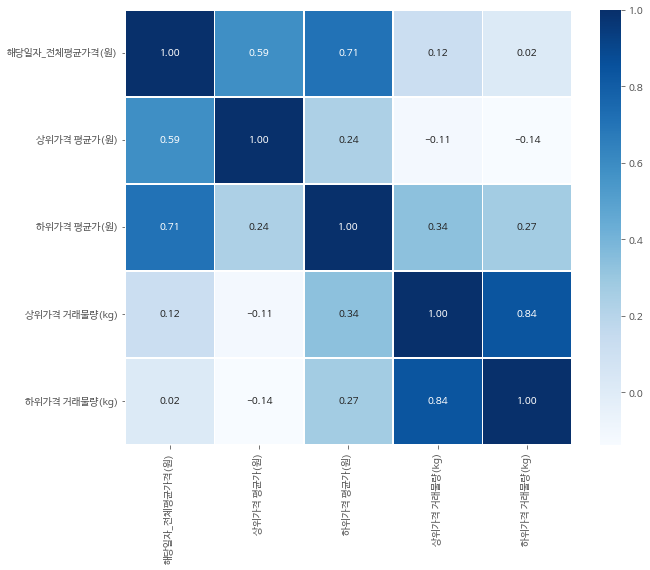

In [ ]:
import seaborn as sns 

plt.figure(figsize=(10,8))
sns.heatmap(data = train_col.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

- 중요해 보이는 피쳐들

  1) 상위가격 평균가(원)

  2) 하위가격 평균가(원)

위 2개의 피쳐들을 이용해서 파생변수들을 만들어 보자

## 피쳐 추가
- 상관관계 분석에서 중요해 보이는 피쳐들을 이용해 피쳐 추가를 해보았다.
- 평균 매출액을 구하기위해 상/하위 거래물량(kg) 피쳐도 이용해 새로운 피쳐를 만들어 보았다.

### 1) 상위가격과 하위가격의 차이(differ)

In [ ]:
train['differ'] = train['상위가격 평균가(원)'] - train['하위가격 평균가(원)']

### 2) 상위 가격의 평균 매출액과 하위 가격의 평균 매출액의 합(plus)

In [ ]:
train['plus'] = train['상위가격 평균가(원)']*train['상위가격 거래물량(kg)'] + train['하위가격 평균가(원)']*train['하위가격 거래물량(kg)']

### 3) 상위와 하위의 거래물량 차이(kg_differ)

In [ ]:
train['kg_differ'] = train['상위가격 거래물량(kg)'] - train['하위가격 거래물량(kg)']

### 4) 상위 가격의 평균 매출액과 하위 가격의 평균 매출액의 차이(m)

In [ ]:
train['m'] = train['상위가격 평균가(원)']*train['상위가격 거래물량(kg)'] - train['하위가격 평균가(원)']*train['하위가격 거래물량(kg)']

### 5) 소매와 도매 가격 차이(sale_price)

In [ ]:
train['sale_price'] = train['일자별_소매가격_평균(원)'] - train['일자별_도매가격_평균(원)']

## 피쳐 추가 후 상관관계 분석

In [ ]:
train_add = train[['해당일자_전체평균가격(원)', '상위가격 평균가(원)','하위가격 평균가(원)','상위가격 거래물량(kg)','하위가격 거래물량(kg)','differ','plus','kg_differ','m']]

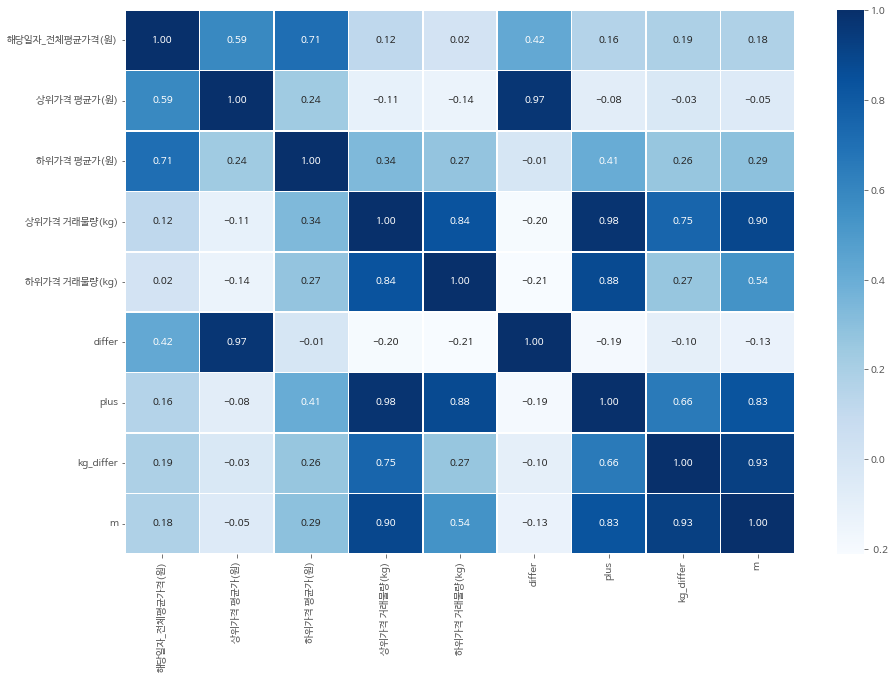

In [ ]:
import seaborn as sns 

plt.figure(figsize=(15,10))
sns.heatmap(data = train_add.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

- 상관관계 분석의 결과를 보니 파생된 피쳐들이 타겟 변수와 높은 상관관계를 나타내는 것을 볼 수 있다.

### 요일 원핫인코딩
- 요일 원핫인코딩을 한 이유는 요일들을 독립적으로 만들어 주기 위해서이다.

In [ ]:
train=pd.get_dummies(train,columns=['week_day'])
train.head()

,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),...,kg_differ,m,sale_price,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
datadate,,,,,,,,,,,,,,,,,,,,,
20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,4605.775000,...,-2.0,345130.70,-174501.477273,0,0,0,1,0,0,0
20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,2003.085396,...,-267.0,221915.25,-174501.477273,0,0,0,0,1,0,0
20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,2266.215190,...,121.0,1470477.00,-174501.477273,0,0,0,0,0,1,0
20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,2882.419857,...,-721.0,-331483.80,-174501.477273,0,0,0,0,0,0,1
20130106,1878.12,40.0,75075.0,2.0,230001.0,23000104.0,800.0,4669.031061,396.0,2192.328522,...,-186.0,573001.10,-173513.068182,1,0,0,0,0,0,0


- week_day_0부터 week_day_6까지 요일 원핫인코딩이 잘 실행되었다.

# 이상치 제거

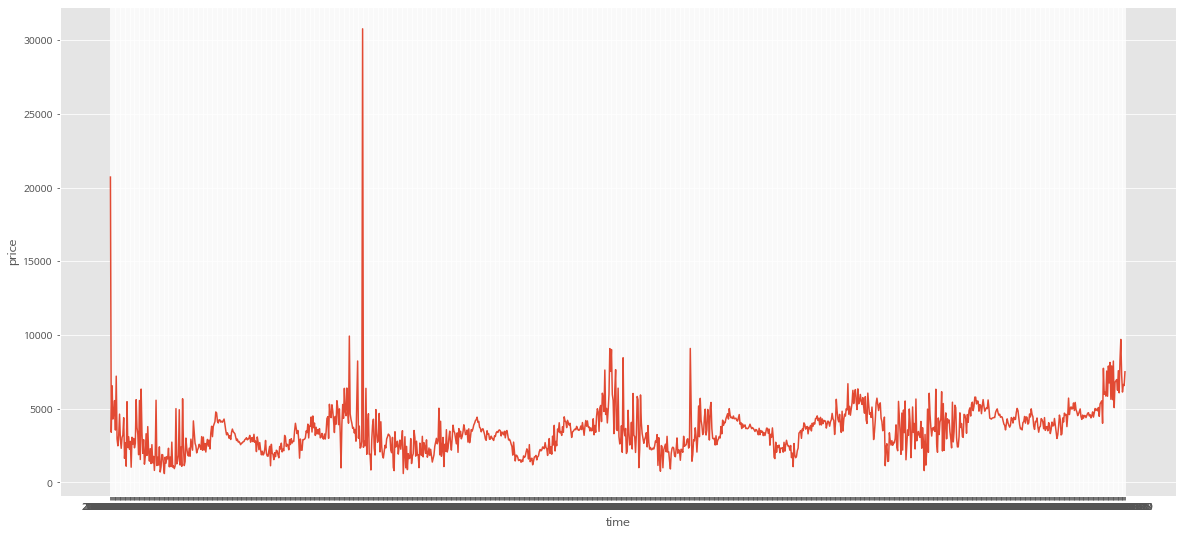

In [ ]:
plt.figure(figsize = (20, 9))
sns.lineplot(x = train['datetime'], y = train['해당일자_전체평균가격(원)'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()

- 위 그래프를 보면 20000이상부터 극도로 높은 수치가 보여 20000이상을 이상치로 판단했다.

In [ ]:
# train = train[train['해당일자_전체평균가격(원)'] <= 20000]

## 독립변수 별 이상치 확인

In [ ]:
col=['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)','differ','plus','kg_differ','m','sale_price']

In [ ]:
# plt.style.use("ggplot")

# feature = col

# plt.figure(figsize=(30,15))
# plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

# for i in range(len(col)):
#   plt.subplot(5,8,i+1)
#   plt.title(feature[i])
#   plt.hist(train[feature[i]])
# plt.show()

## 로그 - 사용x
- 로그를 사용한 독립변수 별 이상치 확인

In [ ]:
# col_log = ['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
#        '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
#        '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
#        '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)','주산지_0_강수량(ml)','주산지_1_강수량(ml)','주산지_2_강수량(ml)','differ','plus']

In [ ]:
# plt.style.use("ggplot")

# feature = col_log

# plt.figure(figsize=(30,15))
# plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

# for i in range(len(col_log)):
#   plt.subplot(5,8,i+1)
#   plt.title(feature[i])
#   plt.hist(np.log1p(train[feature[i]]))
# plt.show()

In [ ]:
# train['상위가격 평균가(원)']=np.log1p(train['상위가격 평균가(원)'])
# train['하위가격 평균가(원)']=np.log1p(train['하위가격 평균가(원)'])
# train['해당일자_전체거래물량(kg)']=np.log1p(train['해당일자_전체거래물량(kg)'])
# train['하위가격 거래물량(kg)']=np.log1p(train['하위가격 거래물량(kg)'])
# train['상위가격 거래물량(kg)']=np.log1p(train['상위가격 거래물량(kg)'])
# train['plus']=np.log1p(train['plus'])

최종적으로 로그를 사용했을 때, 정규화에 잘 근접하게 된 피쳐들

    1) 해당일자_전체거래물량(kg)
    2) 하위가격 평균가(원)
    3) 상위가격 평균가(원)
    4) 하위가격 거래물량(kg)
    5) 상위가격 거래물량(kg)
    6) plus

을 골라 로그를 사용해 train셋에 적용해 주었다.

## 스케일링(MinMaxScaler)
- MinMaxScaler(정규화 작업)
- 정규화란, 모든 값을 0~1 사이의 값으로 바꾸는 것이다. 음수도 예외 없이 다 바꾼다.

In [ ]:
train.columns

Index(['단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드', '산지코드 ',
       '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)',
       '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)',
       '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)',
       '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순', '일자구분_하순',
       '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월', '월구분_3월', '월구분_4월',
       '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월', 'datetime', 'year',
       'differ', 'plus', 'kg_differ', 'm', 'sale_price', 'week_day_0',
       'week_day_1', 'week_day_2', '

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['상위가격 평균가(원)', '하위가격 평균가(원)', '수입중량(kg)',
              '단가(원)', '거래량','differ', 'plus','kg_differ', 'm']
                
scaled = scaler.fit_transform(train[scale_cols])

train[scale_cols] = scaled

train[scale_cols]

,상위가격 평균가(원),하위가격 평균가(원),수입중량(kg),단가(원),거래량,differ,plus,kg_differ,m
datadate,,,,,,,,,
20130102,0.799187,0.665472,1.00000,0.126323,0.000198,0.780516,0.002488,0.286289,0.146404
20130103,0.140349,0.267436,1.00000,0.035635,0.009309,0.137112,0.010506,0.277403,0.145453
20130104,0.154955,0.307677,1.00000,0.176403,0.023569,0.146957,0.010437,0.290413,0.155086
20130105,0.184501,0.401915,1.00000,0.071057,0.106754,0.165067,0.030541,0.262180,0.141184
20130106,0.221531,0.296377,1.00000,0.035208,0.007724,0.219221,0.010555,0.280119,0.148162
...,...,...,...,...,...,...,...,...,...
20161226,0.196234,0.421302,0.72019,0.082327,0.018023,0.174794,0.017068,0.288770,0.158884
20161228,0.189617,0.361351,0.72019,0.053890,0.011685,0.176203,0.056451,0.284043,0.185560
20161229,0.179150,0.562846,0.72019,0.208902,0.003367,0.136750,0.016661,0.286121,0.152663


In [ ]:
# plt.style.use("ggplot")

# feature = train.describe().columns

# plt.figure(figsize=(30,15))
# plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

# for i in range(len(col)):
#   plt.subplot(5,8,i+1)
#   plt.title(feature[i])
#   plt.hist(train[feature[i]])
# plt.show()

- 요일, 연도 추가를 위해 만들었던 'datetime' 제거

In [ ]:
train = train.drop(columns = ['datetime'])

## Dtype이 object인 열 제거

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 20130102 to 20161231
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   단가(원)            1224 non-null   float64
 1   거래량              1224 non-null   float64
 2   거래대금(원)          1224 non-null   float64
 3   경매건수             1224 non-null   float64
 4   도매시장코드           1224 non-null   float64
 5   도매법인코드           1224 non-null   float64
 6   산지코드             1224 non-null   float64
 7   해당일자_전체평균가격(원)   1224 non-null   float64
 8   해당일자_전체거래물량(kg)  1224 non-null   float64
 9   하위가격 평균가(원)      1224 non-null   float64
 10  상위가격 평균가(원)      1224 non-null   float64
 11  하위가격 거래물량(kg)    1224 non-null   float64
 12  상위가격 거래물량(kg)    1224 non-null   float64
 13  일자별_도매가격_최대(원)   1224 non-null   float64
 14  일자별_도매가격_평균(원)   1224 non-null   float64
 15  일자별_도매가격_최소(원)   1224 non-null   float64
 16  일자별_소매가격_최대(원)   1224 non-null   float64
 17  일자별

22  주산지_0_습도(%)      1224 non-null   object

34  주산지_2_습도(%)      1224 non-null   object

주산지 : 주산지는 경상북도 청송군 주왕산면 주산지리에 있는 저수지

In [ ]:
train[['주산지_0_습도(%)']]

train['주산지_1_습도(%)']

train=train.drop(columns = ['주산지_0_습도(%)','주산지_2_습도(%)'])

In [ ]:
# train=train.drop(columns = ['sale_price','kg_differ']) # 'differ','plus','kg_differ','m','sale_price'

# validation 구축

### feature selection - 모델 성능을 확인하면서 선택

In [ ]:
train = train[['해당일자_전체평균가격(원)', '상위가격 평균가(원)', '하위가격 평균가(원)', '수입중량(kg)',
              '단가(원)', '거래량', 'year','differ', 'plus','kg_differ', 'm']]

In [ ]:
from sklearn.model_selection import train_test_split


# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
X= train.drop(columns=['해당일자_전체평균가격(원)'])
y= train['해당일자_전체평균가격(원)']

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
y_train.head()

datadate
20140412    1380.436364
20160110    5370.293301
20150209    5933.086957
20150307    3035.313423
20140302     603.056607
Name: 해당일자_전체평균가격(원), dtype: float64

In [ ]:
X_valid.head()

,상위가격 평균가(원),하위가격 평균가(원),수입중량(kg),단가(원),거래량,year,differ,plus,kg_differ,m
datadate,,,,,,,,,,
20131118,0.136423,0.449300,0.636983,0.172200,0.006536,2013,0.107365,0.018906,0.286390,0.153765
20130701,0.067106,0.358480,0.768785,0.055600,0.303624,2013,0.046555,0.275660,0.369916,0.277937
20160717,0.075801,0.478169,0.000000,0.084500,0.025153,2016,0.038950,0.596865,0.619119,0.533713
20130830,0.067171,0.168680,0.570799,0.034006,0.003763,2013,0.073320,0.015335,0.271737,0.146971
20150430,0.038140,0.250123,0.573778,0.035208,0.007724,2015,0.031048,0.005177,0.279885,0.141508


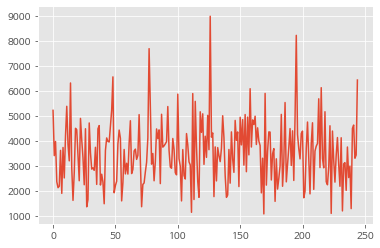

In [ ]:
from sklearn.ensemble import RandomForestRegressor

ppoa_model = RandomForestRegressor()

ppoa_model.fit(X_train, y_train)

ppoa_count_predict = ppoa_model.predict(X_valid)

plt.plot(ppoa_count_predict)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(pred, real):
  return mean_squared_error(pred, real)**0.5

In [ ]:
def make_plot():
  RMSE = rmse(ppoa_count_predict, y_valid)

  plt.figure(dpi=150)

  plt.title('RMSE : ' + str(RMSE)[:8])

  plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
  plt.plot(ppoa_count_predict, alpha=0.6, label='pred')

  plt.legend()
  plt.show()

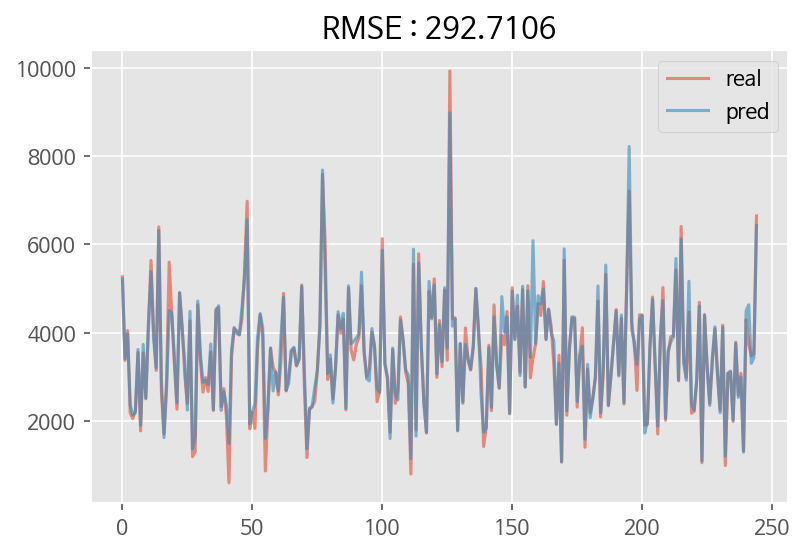

In [ ]:
make_plot()